In [1]:
# % matplotlib notebook 
from IPython.display import IFrame, display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib          import rc 
from matplotlib          import cm
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
import os.path as path
import wget
from scipy.stats import norm

In [2]:
def GetHisto(l,NChannels,h = 1):
    h = 1.
    bins = np.arange(1,NChannels+2*h,h)
    w = np.diff(bins)
    m = bins[:-1] + 0.5*w[0] # marcas de clase
    return l,m,w

In [3]:
def GetHisto2(l, h = 0.1, norm=True):
    
    min_=np.min(l)
    max_=np.max(l)
    
    x = np.arange(min_,max_+h,h)
    
    H, bines = np.histogram(l,bins=x)
    w = np.diff(bines)
    m = bines[:-1] + 0.5*w[0] # marcas de clase
    
    if norm:
        H = H / (np.sum(H*w))
    
    return H,bines,m,w

In [4]:
!rm Data/*
file = 'Data/data.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/ObsExtraT.csv'
if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

rm: no se puede borrar 'Data/*': No existe el archivo o el directorio
File loaded


In [5]:
Df = pd.read_csv(Path_,sep = ',')
print(Df)

   NData  NBkg  NSignal1  NSignal2
0     10     9        10         3
1     20    17        15         6
2     10     5        10         3
3      6     6         4         1


In [6]:
n = np.array(Df.NData)
b = np.array(Df.NBkg)
s = np.array(Df.NSignal2)
NChannels = len(n)

In [7]:
# Definimos el rango de los histogramas
HData,m,w = GetHisto(n, NChannels)
ErrorData = np.sqrt(HData) # Error poisson

HBkg,m,w = GetHisto(b, NChannels)
HSignal,m,w = GetHisto(s, NChannels)

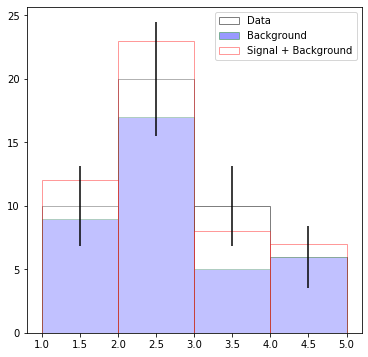

In [8]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.bar(m,HData,yerr=ErrorData, color='w', width=w, ec='k', label='Data', alpha=0.5)
ax.bar(m,HBkg, color='b' ,width=w, ec='g', label='Background', alpha=0.4)
ax.bar(m,HBkg+HSignal, color='w' ,width=w, ec='r', label='Signal + Background', alpha=0.4)
ax.legend(loc=0)